## Labo Week 6 

### **Deel 1** **Alternatieve metrieken om modellen te vergelijken**


**Oefening 1** : 

Gebruik voor deze oefening de cijfers.txt datafile uit labo 5. Stel 2 verschillende classificatiemethoden op : (lineaire model en decision trees) en gebruik onderstaande metrieken om de 2 modellen te vergelijken. 

**1.1** Gebruik 25% van de data om te testen en bereken van beide alvast de klassieke accuracy.

**1.2** Bereken daarna de confusion matrix van beide modellen, gebruik hierbij :
```
from sklearn.metrics import confusion_matrix
```

**1.3** Bepaal nu de precision, recall en F1 score via :
```
from sklearn.metrics import classification_report
```

**1.4** Teken ten slotte de ROC curve. Hiervoor moet je de false positive rate uitzetten t.o.v de true positive rate. Je zal eerst voor elk element in de test set de kans om terecht te komen in de true state (toeglaten) moeten berekenen, dit kan via de methode : 
```
modellogistRegr.predict_proba(x_Examtest)[:,1]
```
Via de 
```
from sklearn.metrics import roc_curve
```
kan je nu de false positive en true positive rate berekenen en kan je deze plotten t.o.v. elkaar

_Tip:_ [Goeie blog rond de verschillende technieken](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)


In [121]:
#1.1
import pandas as pd
cijferData = pd.read_csv('cijfers.txt', names= ['Examen1','Examen2','Toegelaten'])
cijferData

,Examen1,Examen2,Toegelaten
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1




**1.2** Bereken daarna de confusion matrix van beide modellen, gebruik hierbij :
```
from sklearn.metrics import confusion_matrix
```




In [122]:
#1.2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

features = ['Examen1','Examen2']

#linear
X_train, X_test, y_train, y_test = train_test_split(cijferData.loc[:,features], cijferData['Toegelaten'], test_size= 0.25)
lr = LogisticRegression().fit(X_train,y_train)
lt_linear = lr.predict(X_test)

# decision
cif = DecisionTreeClassifier(random_state=4 , max_depth= 3)
cif.fit(X_train,y_train)
cif_tree = cif.predict(X_test)
print("Accuracy on training set: {:.3f}".format(cif.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(cif.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

print("Confusion matrix Decision Tree :\n{}".format(confusion_matrix(y_test, cif_tree)))
## TP/FP
## FN/TN

print("Confusion matrix LinearRegression :\n{}".format(confusion_matrix(y_test, lt_linear)))

Accuracy on training set: 0.973
Accuracy on test set: 0.800
Confusion matrix Decision Tree :
[[ 7  1]
 [ 4 13]]
Confusion matrix LinearRegression :
[[ 8  0]
 [ 1 16]]




**1.3** Bepaal nu de precision, recall en F1 score via :
```
from sklearn.metrics import classification_report
```



In [123]:
#1.3
from sklearn.metrics import classification_report
print("linear", classification_report(y_test,lt_linear), "\n")
print("tree", classification_report(y_test,cif_tree))


linear               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.94      0.97        17

    accuracy                           0.96        25
   macro avg       0.94      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25
 

tree               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.93      0.76      0.84        17

    accuracy                           0.80        25
   macro avg       0.78      0.82      0.79        25
weighted avg       0.84      0.80      0.81        25





**1.4** Teken ten slotte de ROC curve. Hiervoor moet je de false positive rate uitzetten t.o.v de true positive rate. Je zal eerst voor elk element in de test set de kans om terecht te komen in de true state (toeglaten) moeten berekenen, dit kan via de methode : 
```
modellogistRegr.predict_proba(x_Examtest)[:,1]
```
Via de 
```
from sklearn.metrics import roc_curve
```
kan je nu de false positive en true positive rate berekenen en kan je deze plotten t.o.v. elkaar

_Tip:_ [Goeie blog rond de verschillende technieken](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)


In [124]:
#1.4
y_pred_prob = cif.predict_proba(X_test)[:,1]

y_preb_prob = lr.predict_proba(X_test)[:,1]

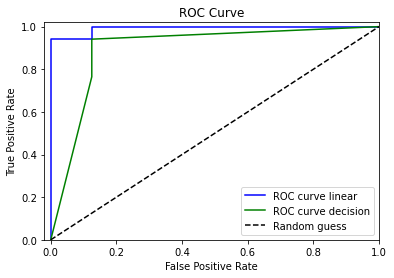

In [125]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fprr, tprr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot


fpr, tpr, thresholds = roc_curve(y_test, y_preb_prob)
# create plot
plt.plot(fpr, tpr, 'b-' ,label='ROC curve linear')
plt.plot(fprr, tprr, 'g-', label='ROC curve decision')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

### **Deel 2** Het effect van schalen van data

Het schalen van features kan een grote impact hebben op het eindresultaat van sommige algoritmen, terwijl bij andere er amper een effect te zien is. Wanneer de dataset features bevat die heel erg variëren in grootte, eenheden en ranges en je een algoritme wil gebruiken dat afhankelijk is van de Euclidische afstandsmaat is het een goed idee om je data eerst de schalen.

**Oefening 2** 
Hergebruik in deze oefening de _auto\_extra.txt_ datafile met het _mpg_ regressie probleem. 

 **2.1**  Maak een boxplot van de featuredata om te zien hoe deze varieert in grootte en schaal t.o.v. elkaar. Info over maken van boxplots : https://matplotlib.org/3.2.1/gallery/pyplots/boxplot_demo_pyplot.html
 Teken deze boxplots opnieuw na schaling van de data door de varianten MinMaxScaler, standardScaler, RobustScaler
 
 **2.2** Test enkele algoritmen die je kent (Lineaire regressie, Lasso, Ridge, KNN, DecisionTree, RandomForest, ...) en ga na welke hiervan baat hebben bij schaling op deze data (probeer de varianten MinMaxScaler, StandardScaler, RobustScaler).
 Geef je resultaten weer in een pandas dataframe. Je mag van elk algoritme de default parametersettings gebruiken, op die manier kan je het opstellen en fitten van al deze modellen op een algemene manier via een functie doen, waarbij je een lijst van scalers en een lijst van modellen meegeeft als argument.
 Bvb :
  ```
 def runScalers(models, scalers)
 ```

In [148]:
#2.1
import numpy as np
import pandas as pd
data = pd.read_table('auto_extra.txt',delim_whitespace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [126]:

data = data.replace('?', np.nan)
data = data.dropna()
data.horsepower = data.horsepower.astype('float')
#data.info()
features = data.iloc[:,1:8]
target = data.iloc[:,0:1]
print(features.values)


[[  8.  307.  130.  ...  12.   70.    1. ]
 [  8.  350.  165.  ...  11.5  70.    1. ]
 [  8.  318.  150.  ...  11.   70.    1. ]
 ...
 [  4.  135.   84.  ...  11.6  82.    1. ]
 [  4.  120.   79.  ...  18.6  82.    1. ]
 [  4.  119.   82.  ...  19.4  82.    1. ]]


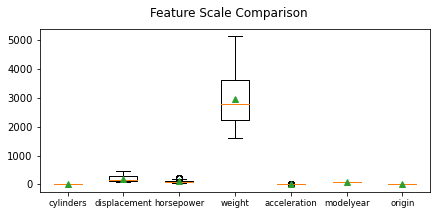

In [127]:
names =features.columns

def featureBoxPlot(X, names, title):
    plt.rcParams["figure.figsize"] = [7,3]
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot()
    plt.boxplot(X, showmeans=True)
    ax.set_xticklabels(names, fontsize = 8.5)
    plt.show()
    return

featureBoxPlot(features.values, names,"Feature Scale Comparison")

In [128]:
#2.2


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

scalers = [MinMaxScaler(), StandardScaler(),RobustScaler()]
models = [LinearRegression(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),MLPRegressor(),SVR()]
scalernames = [str(s).split('(')[0] for s in scalers]
modelnames = [str(m).split('(')[0] for m in models]

results = []


In [130]:
X_MPG = data.loc[:, list(["cylinders","displacement","horsepower","weight","acceleration"])]
print(X_MPG.head())
Y_MPG = data.loc[:,"mpg"]
print(Y_MPG.head())

   cylinders  displacement  horsepower  weight  acceleration
0          8         307.0       130.0  3504.0          12.0
1          8         350.0       165.0  3693.0          11.5
2          8         318.0       150.0  3436.0          11.0
3          8         304.0       150.0  3433.0          12.0
4          8         302.0       140.0  3449.0          10.5
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


In [131]:
def runScalers(models,scalers):
    for model in models:
        model_results = []
        for method in scalers:
            X_train,X_test,y_train,y_test = train_test_split(X_MPG,Y_MPG,test_size=0.3,random_state= 25)
            method.fit(X_train)
            X_train_scaled = method.transform(X_train)
            X_test_scaled = method.transform(X_test)

            model.fit(X_train_scaled,y_train)
            score_test_scaled = model.score(X_test_scaled,y_test)
            model_results.append(round(score_test_scaled,3))
        results.append(model_results)
    return results

def runNoScalers(models):
    model_results = []
    for model in models:
        X_train,X_test,y_train,y_test = train_test_split(X_MPG,Y_MPG,test_size=0.3,random_state= 25)
        model.fit(X_train,y_train)
        score_test = model.score(X_test,y_test)
        model_results.append(round(score_test,3))
    return model_results

resultsScaler = runScalers(models,scalers)
resultOriginal = runNoScalers(models)


        
        

c:\Users\Guest\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Guest\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Guest\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Guest\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Deel 3** Unsupervised learning : clusteren

**Oefening 3** 

Gegeven volgende artificiële data :

          X         Y color
0  0.421152 -0.070525   red
1  0.046163 -1.119060   red
2  0.690693  0.200787   red
3 -0.483753  1.320020   red
4  2.094587  0.739413   red


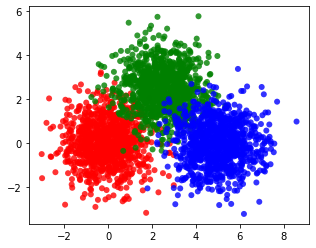

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000 
test = pd.DataFrame(np.random.normal(size=(3*N,2)))
test.loc[0:N,2] = 'red'
test.loc[N:2*N,2] = 'green'
test.loc[2*N:3*N,2] = 'blue'
test.columns=['X', 'Y', 'color']
test.iloc[N:2*N,0:2] += 2.5
test.iloc[2*N:3*N,0] += 5

print(test.head())

plt.scatter(test.iloc[:,0], test.iloc[:,1], alpha=0.8, c=test.iloc[:,2], edgecolors='none', )
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

   __3.1__ Gebruik k-means(++)  om de gecreërde clusters terug te vinden. Visualiseer de cluster opnieuw en vergelijk met de oorspronkelijke plot. Varieer met de waarde k. 
   
   __3.2__ Probeer de ideale k-waarde te vinden via enerzijds :
       * de Elbow methode om de optimale waarde voor k te bepalen. Hiertoe gebruik je een score functie. Vergelijk tussen twee score functies:
        - inertia of de SSE score :  deze berekent de som van de kwadraten van de afstand van elk punt tot zijn cluster center en kan je gewoon opvragen aan je Kmeans model 
        - Distortion score : Deze berekent de gemiddelde afstand van een punt tot zijn clustercentrum. Gebruik de functie cdist om de  de Euclidische afstand te berekenen.   
    ```
    from scipy.spatial.distance import cdist
    ```
     
      * Ga ook na hoe je de silhouette score kan gebruiken om een keuze van k te maken.  Bereken de Silhouette score van je modellen via : 
 ```
 from sklearn.metrics import silhouette_score
 ```
 
 
  __3.3__ Wat geeft DBSCAN op deze convexe data? Plot je resultaat naast de oorspronkelijke data.
    Bereken ook de silhouette score voor DBSCAN.
 

In [133]:
X = test.loc[:,["X","Y"]]
#test[['X','Y']]
X.head()




,X,Y
0,0.421152,-0.070525
1,0.046163,-1.119060
2,0.690693,0.200787
3,-0.483753,1.320020
4,2.094587,0.739413


In [134]:
#3.1 k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# build the clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
color_predict = kmeans.predict(X)

silhouette_avg = silhouette_score(X, color_predict)
print("For n_clusters a" , 3 , "The avergae silhooute score is" , silhouette_avg)

print("cluster centers: ", kmeans.cluster_centers_)


For n_clusters a 3 The avergae silhooute score is 0.511644135743655
cluster centers:  [[ 2.45981222e+00  2.47474392e+00]
 [-8.02686715e-02  1.21476715e-03]
 [ 4.99042060e+00 -5.57734990e-02]]


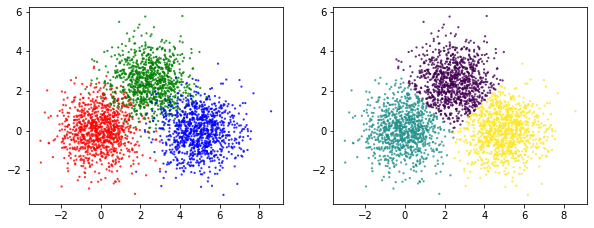

In [135]:
fig, ax = plt.subplots(1,2,figsize=(10,20))
ax[0].scatter(test.iloc[:,0],test.iloc[:,1],alpha= 0.8, c = test.iloc[:,2], edgecolors = 'none',s=5)
ax[1].scatter(X.iloc[:,0],X.iloc[:,1],alpha= 0.8, c = color_predict, edgecolors = 'none',s=5)
for ax in [ax[0], ax [1]]:
    ax.set_aspect('equal', adjustable= 'box')
plt.show()

In [136]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)
color_predict2 = kmeans2.predict(X)

silhouette_avg = silhouette_score(X, color_predict2)
print("For n_clusters a" , 2 , "The avergae silhooute score is" , silhouette_avg)
print("cluster centers: ", kmeans.cluster_centers_)


For n_clusters a 2 The avergae silhooute score is 0.43862235426987595
cluster centers:  [[ 2.45981222e+00  2.47474392e+00]
 [-8.02686715e-02  1.21476715e-03]
 [ 4.99042060e+00 -5.57734990e-02]]


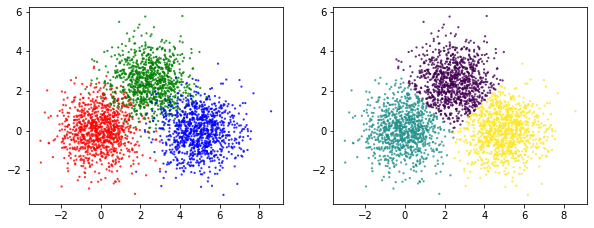

In [137]:
fig, ax = plt.subplots(1,2,figsize=(10,20))
ax[0].scatter(test.iloc[:,0],test.iloc[:,1],alpha= 0.8, c = test.iloc[:,2], edgecolors = 'none',s=5)
ax[1].scatter(X.iloc[:,0],X.iloc[:,1],alpha= 0.8, c = color_predict, edgecolors = 'none',s=5)
for ax in [ax[0], ax [1]]:
    ax.set_aspect('equal', adjustable= 'box')
plt.show()

In [138]:
#3.2 Elbow methode
from scipy.spatial.distance import cdist

set1 = [(1,5),(2,6)]
set2 = [(3,7),(4,6)]

afstandmatrix = cdist(set1,set2, 'euclidean')
print(afstandmatrix)
print(afstandmatrix.shape)

[[2.82842712 3.16227766]
 [1.41421356 2.        ]]
(2, 2)


In [139]:
arr = np.array([1,2,3,4,5,6,7,8]).reshape(2,-1)
print(arr)

print(cdist(X,kmeans.cluster_centers_, 'euclidean').shape)

[[1 2 3 4]
 [5 6 7 8]]
(3000, 3)


   __3.2__ Probeer de ideale k-waarde te vinden via enerzijds :
       * de Elbow methode om de optimale waarde voor k te bepalen. Hiertoe gebruik je een score functie. Vergelijk tussen twee score functies:
        - inertia of de SSE score :  deze berekent de som van de kwadraten van de afstand van elk punt tot zijn cluster center en kan je gewoon opvragen aan je Kmeans model 
        - Distortion score : Deze berekent de gemiddelde afstand van een punt tot zijn clustercentrum. Gebruik de functie cdist om de  de Euclidische afstand te berekenen.   
    ```
    from scipy.spatial.distance import cdist
    ```
     
      * Ga ook na hoe je de silhouette score kan gebruiken om een keuze van k te maken.  Bereken de Silhouette score van je modellen via : 
 ```
 from sklearn.metrics import silhouette_score
 ```
 
 De silhouetscore wordt gebruikt om de kwaliteit te evalueren van clusters die zijn gemaakt met behulp van clusteringalgoritmen zoals K-Means in termen van hoe goed monsters zijn geclusterd met andere monsters die op elkaar lijken

For n_clusters a 2 The avergae silhouette score is 0.43956403633675867
For n_clusters a 3 The avergae silhouette score is 0.511644135743655
For n_clusters a 4 The avergae silhouette score is 0.40990417023493797
For n_clusters a 5 The avergae silhouette score is 0.34294969788418933
For n_clusters a 6 The avergae silhouette score is 0.3316183613535504
For n_clusters a 7 The avergae silhouette score is 0.3309502525238982
For n_clusters a 8 The avergae silhouette score is 0.3260939073404298
For n_clusters a 9 The avergae silhouette score is 0.32939532366520846
[2 3 4 5 6 7 8 9]
[1.7402240831246245, 1.2008750975154943, 1.1090781488287773, 1.026630494869649, 0.9488028976187673, 0.8853973792081595, 0.8375921881071704, 0.7943103549619659]


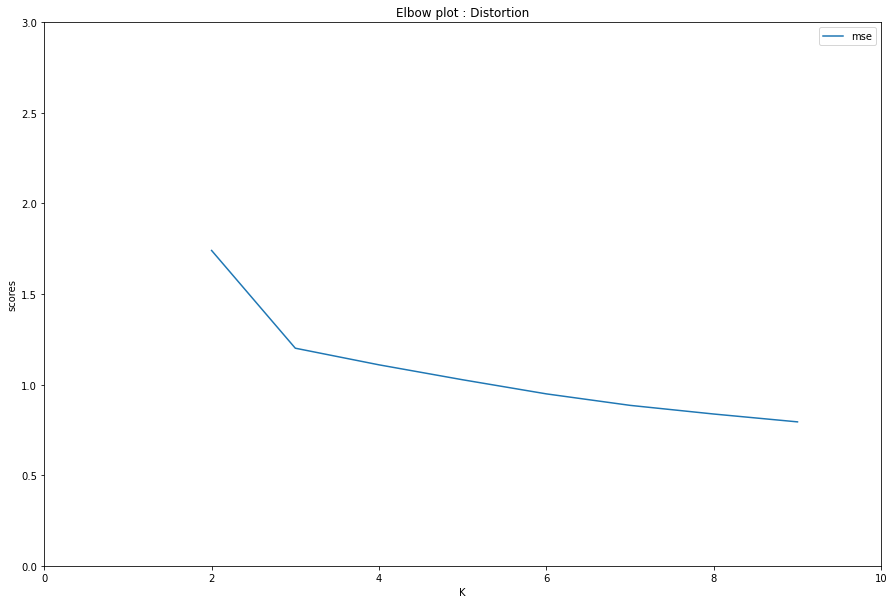

In [145]:
k_waarden = np.arange(2,10,1)
score = []
for k in k_waarden:
    model = KMeans(n_clusters=k)
    model.fit(X)
    score.append(sum(np.min(cdist(X,model.cluster_centers_, 'euclidean'), axis= 1)) / X.shape[0])
    #score.append(sum(np.min(cdist(test[['X', 'Y']], model.cluster_centers_,'euclidean'),axis = 1)) / test.shape[0])
    color_predict2 = model.predict(X)
    np.unique(model.labels_)

    silhouette_avg = silhouette_score(X, model.labels_, metric='euclidean')
    print("For n_clusters a" , k , "The avergae silhouette score is" , silhouette_avg)
    #afstandmatrix = cdist(set1,set2, 'euclidean')
    #print(afstandmatrix)
    #print(afstandmatrix.shape)

print(k_waarden)
print(score)

plt.figure(figsize = (15,10)) #15 is width 10 is height
plt.plot(k_waarden,score,label = 'mse')
plt.title('Elbow plot : Distortion')
plt.xlabel('K')
plt.ylabel('scores')
plt.xlim(0,10)
plt.ylim(0,3)
plt.legend(loc = 'best')
plt.show()

In [146]:
#3.3 DBSCANb
#3.3 DBSCANb
from sklearn.cluster import KMeans, DBSCAN
dbsc = DBSCAN(eps=1, min_samples=3).fit(test[['X', 'Y']])
labels = dbsc.labels_

arr = np.array(labels)
print(np.unique(arr))


print("Silhouette Coefficient: %0.3f"% silhouette_score(test[['X', 'Y']], labels))

[-1  0]
Silhouette Coefficient: 0.376


### Deel 4 : Neurale Netwerken 

**Oefening 4**
Gegeven onderstaande 2 dimensionale data verkregen door toepassing van de Xor functie. 

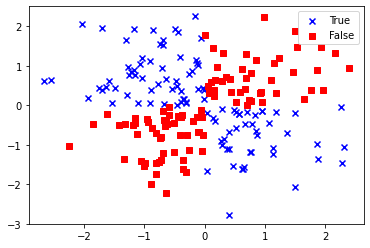

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
#y_xor = np.where(y_xor, 1, -1) # map True -> 1 , False -> -1
plt.scatter(X_xor[y_xor, 0], X_xor[y_xor, 1], c='b', marker='x', label='True')
plt.scatter(X_xor[y_xor == False, 0], X_xor[y_xor== False, 1], c='r', marker='s', label='False')
plt.ylim(-3.0)
plt.legend()
plt.show()


__4.1__ Ga na hoe een multi layer perception model presteert op deze data. Gebruik niet de default instellingen van de parameters maar onderzoek telkens met welke instellingen het leermodel minimaal / maximaal presteert. Je kan de evaluatie van je settings visueel beoordelen door de decision boundary te plotten (gebruik hiertoe weer een grid van (x,y) coördinaten die de volledige rechthoek omvat - zie code onderaan) Maar uiteraard zou je ook een grid_search kunnnen uitvoeren en de accuracies vergelijken.

Vermits de data 'netjes' gegenereerd werd hoef je hier geen schaling toe te passen.

In [ ]:
x1_min, x1_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
x2_min, x2_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
print(x1_min, x1_max)
print(x2_min, x2_max)

grid = np.mgrid[x1_min:x1_max:0.01, x2_min:x2_max:0.01].reshape(2,-1).T

-3.659172237996741 3.383144774863942
-3.77259275642665 3.2567234972982093


In [ ]:
#4.1
nr_of_nodes = [1,2,3,5,10]

for nodes in nr_of_nodes:
    lst = [nodes for i in range(1, nodes +1)]
    print(lst)
    hlt = tuple(lst)
    print(hlt)

[1]
(1,)
[2, 2]
(2, 2)
[3, 3, 3]
(3, 3, 3)
[5, 5, 5, 5, 5]
(5, 5, 5, 5, 5)
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
(10, 10, 10, 10, 10, 10, 10, 10, 10, 10)


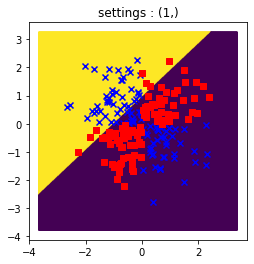

c:\Users\Guest\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


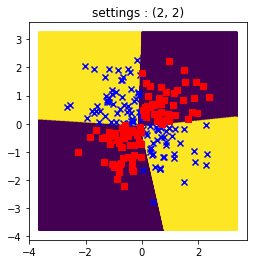

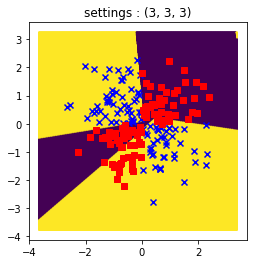

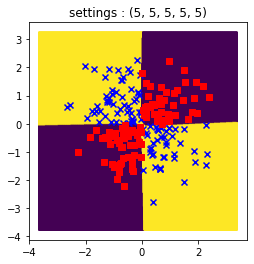

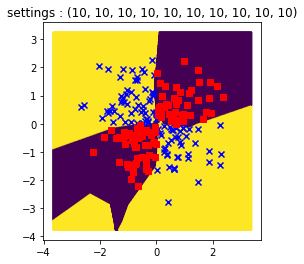

In [ ]:
from sklearn.neural_network import MLPClassifier

for nodes in nr_of_nodes:
    lst = [nodes for i in range(1,nodes +1)]
    hls = tuple(lst)

    mlp = MLPClassifier(solver = 'lbfgs', random_state= 0, hidden_layer_sizes= hls).fit(X_xor,y_xor)
    predictor = mlp.predict(grid)

    plt.scatter(grid[:,0], grid [:,1],c = predictor, edgecolors= 'none', s =2)
    plt.scatter(X_xor[y_xor, 0], X_xor[y_xor,1], c = 'b' , marker= 'x', label = 'True')
    plt.scatter(X_xor[y_xor == False, 0], X_xor[y_xor == False,1], c = 'r', marker= 's', label = 'False')
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.title('settings : ' + str(hls))
    plt.show()